Ben McAteer 0029592670 PS1 BME 511
1B: The Peak max frequencies are [100.0, 169.0, 221.00000000000003, 223.00000000000003, 700.0] Hz
1C: Peak amplitudes are relative to the highest frequency [1.09  1.663 2.174 2.124]
1D: The phase of each sinusiod (in Radians) is: [-0.06 -0.11 -0.14 -0.14 -0.42]


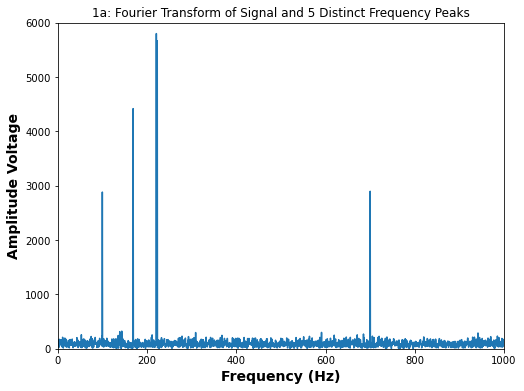

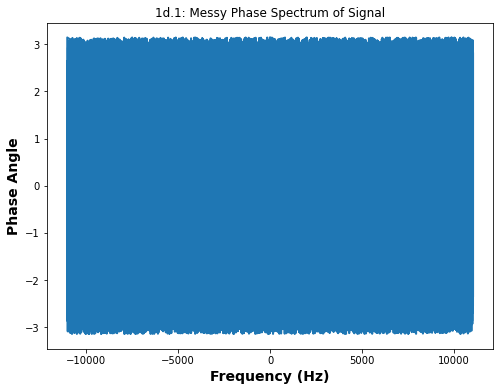

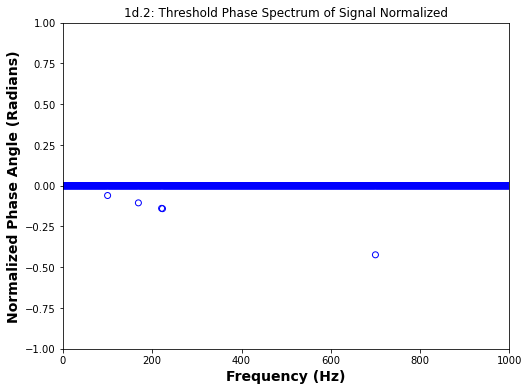

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.fft import fft, ifft
from IPython.display import Audio

#1
print('Ben McAteer 0029592670 PS1 BME 511')
mysterysig = loadmat('mysterysignal')

signal = (mysterysig['x'])
signal = signal[0][:] #isolates the signal from the matlab file

time = len(signal[:]) #time points from 0-2seconds multiplied by the sample freq

samplefreq = 22050 #sample frequency in Hz

t = np.arange(0, 2, 1/samplefreq)  #time points from 0-2seconds divided by the sample freq

"""
Plot of original signal
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(t,signal, color = 'tab:blue',linewidth=2,label='Voltage (V)')
ax.set_xlabel('Time(s)',fontweight='bold',fontsize=14)
ax.set_ylabel('Voltage',fontweight='bold',fontsize=14)
"""

Xf = np.fft.fft(signal) # np.fft.fft(signal) is what he did in lecture
f = np.fft.fftfreq(Xf.shape[0]) * samplefreq #

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(f,abs(Xf), label='Fourier of X')
ax.set(xlim=(0,1000), ylim=(0,6000))
ax.set_title('1a: Fourier Transform of Signal and 5 Distinct Frequency Peaks')
ax.set_xlabel('Frequency (Hz)',fontweight='bold',fontsize=14)
ax.set_ylabel('Amplitude Voltage',fontweight='bold',fontsize=14)

#1.b
DPeak = [] # Freq where peaks occur
PeakAmp = [] # amps of peaks
count = 0

for i in np.arange(0,len(Xf)):
    if (Xf[i] > 1000 and f[i] < 1000 and f[i] > 0):
        DPeak.append(f[i])
        PeakAmp.append(Xf[i])

print('1B: The Peak max frequencies are',DPeak,'Hz')

NormalPeakAmp = (PeakAmp / PeakAmp[4].real).real
#1.c
NormalPeakAmp = np.around(NormalPeakAmp, decimals=3)
print('1C: Peak amplitudes are relative to the highest frequency', NormalPeakAmp[0:4])

#1.d
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(f,np.angle(Xf), color = 'tab:blue',linewidth=2,label='Voltage (V)')
ax.set_xlabel('Frequency (Hz)',fontweight='bold',fontsize=14)
ax.set_ylabel('Phase Angle',fontweight='bold',fontsize=14)
ax.set_title('1d.1: Messy Phase Spectrum of Signal')

threshold = PeakAmp[4]
phi = np.angle(Xf) # sets phase to zero for any frequency less than 50% the magnitude of the smallest peak
phi[np.abs(Xf) < threshold] = 0

fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(f,phi, color = 'tab:blue',facecolors='none', edgecolors = 'b')
ax.set(xlim=(0,1000), ylim=(-1,1))
ax.set_xlabel('Frequency (Hz)',fontweight='bold',fontsize=14)
ax.set_ylabel('Normalized Phase Angle (Radians)',fontweight='bold',fontsize=14)
ax.set_title('1d.2: Threshold Phase Spectrum of Signal Normalized')

phizero = []

for i in np.arange(0,len(Xf)):
    if (phi[i] <0):
        phizero.append(phi[i])

phizero = np.around(phizero, decimals=2)
        
print('1D: The phase of each sinusiod (in Radians) is:',phizero)

2A: The signal is 2.0 seconds long
2D: Compared to the full signal, the smaller sample size leads to higher variance and a lower resolution plot. There are still 5 peaks, but the two similar peaks are blended together making only 4 visible peaks. More data or a longer signal creates more accurate measurements, higher resolution frequency plots, and reduces noise.
2E: Multiplying in time is convol in frequency and vice versa. Multipling xf by a sinc funtion (box) causes ripples. The shorter the box in the time domain, the larger the ripples. An infintely large box in the time domain creates a perfect dirac delta signal in the frequency domain, in other words, an infinitely sampled signal would perfectly recreate in the frequency domain without any distortion. Therefore, a shorter box of 200ms rather than 2000ms creates larger ripples in the frequency domain


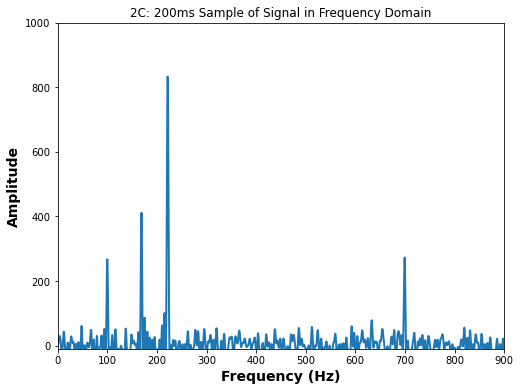

In [7]:
#2

TotalTime = (len(t) / samplefreq) #time of signal in seconds
x200 = signal[:4410]

print('2A: The signal is',TotalTime,'seconds long')

Xf2 = np.fft.fft(x200, len(Xf))
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(f,np.real(Xf2), color = 'tab:blue',linewidth=2,label='Voltage (V)')
ax.set(xlim=(0,900), ylim=(-10,1000))
ax.set_xlabel('Frequency (Hz)',fontweight='bold',fontsize=14)
ax.set_ylabel('Amplitude',fontweight='bold',fontsize=14)
ax.set_title('2C: 200ms Sample of Signal in Frequency Domain')

print('2D: Compared to the full signal, the smaller sample size leads to higher variance and a lower resolution plot. There are still 5 peaks, but the two similar peaks are blended together making only 4 visible peaks. More data or a longer signal creates more accurate measurements, higher resolution frequency plots, and reduces noise.')

print('2E: Multiplying in time is convol in frequency and vice versa. Multipling xf by a sinc funtion (box) causes ripples. The shorter the box in the time domain, the larger the ripples. An infintely large box in the time domain creates a perfect dirac delta signal in the frequency domain, in other words, an infinitely sampled signal would perfectly recreate in the frequency domain without any distortion. Therefore, a shorter box of 200ms rather than 2000ms creates larger ripples in the frequency domain')

In [8]:
#3
stalbans = loadmat('stalbans') #audio data

h = (stalbans['h']) # impulse response
fs = (stalbans['fs']) #sampling rate
x = (stalbans['x']) # random sentence

fs = fs[0] #formatting the sampling rate into a vector
fs = fs[0]


Audio(data=x, rate =fs) #plays audio

zerosneeded = round((len(h[0])-len(x[0])) / 2)

NewX = np.pad(x[0][:],zerosneeded, 'constant')
NewX = np.append(0,NewX)


hF = np.fft.fft(h) 
xFF = np.fft.fft(NewX)

hF = hF[0][:]
#xFF = xFF[0][:]
#convulving is a way to combine the two signals over time, so now in the frequency domain they just multiply
ConvX = hF * xFF #multiplies in freq domain

Xconvolved = abs(np.fft.ifft(ConvX)) #slight delay compared to the np.conv funciton
fx = np.fft.fftfreq(Xconvolved.shape[0]) * fs

h = h[0]
x = x[0]
PythonConvolution = np.convolve(h, x)

#fig,ax = plt.subplots(figsize=(8,6))
#ax.plot(fx,np.real(ConvX), color = 'tab:blue',linewidth=2,label='Voltage (V)')
#ax.plot(fx,Convolutionx, color = 'tab:red',linewidth=2,label=' Voltage (V)')
#ax.set(xlim=(0,900), ylim=(-10,1000))
#ax.set_xlabel('Freq',fontweight='bold',fontsize=14)
#ax.set_ylabel('Voltage squared',fontweight='bold',fontsize=14)

print('3: The "conv" function create a reverb sound to the original audio. The LTI works to make it sound like it is from the Lady Chapel at St Albans Cathedral. There is a sort of echo created.')
print('3c: The results from the python convolution function and the manual fourier transformations almost match, but the maunaul convolution introduces a slight half-second delay and loses some quality. This is likely due to the methods of "windowing" the function with the impulse h frequency which loses some data, shifts and delays the signal.')

3: The "conv" function create a reverb sound to the original audio. The LTI works to make it sound like it is from the Lady Chapel at St Albans Cathedral. There is a sort of echo created.
3c: The results from the python convolution function and the manual fourier transformations almost match, but the maunaul convolution introduces a slight half-second delay and loses some quality. This is likely due to the methods of "windowing" the function with the impulse h frequency which loses some data, shifts and delays the signal.


In [9]:
Audio(data=x, rate =fs) #plays original audio

In [10]:
Audio(data=Xconvolved, rate =fs) #plays audio

In [11]:
Audio(data=PythonConvolution, rate =fs) #plays audio

#4
A = Q Because A views as an aboslute value of a sine wave with other functions added

B = P As it is a couple frequencies close to each other. closer than E or S

C = T Because One period of a sine wave must have had destructive interference with other frequency signals. It appears to be a sine wave multiplied by a small box, making it a sinc function in the frequencey domain with large ripples

D = R Because although it is similar to C/T, the more waves make it closer to dirac delta function. it appears to be a sine wave multiplied by a larger box than C/T, making it more like a delta function in the frequency domain. 

E = S Because it is a few frequencies similarly close together but more spread out than B since the waving of the change in amplitude is slower and diffferent than the sine frequency.



In [12]:
#5
variance = 100 #mm noise
stdev = 10
TruDepth = 47 #mm true depth of target

#5a
NumMeasures = 4
Measurement = np.arange(0,NumMeasures)

for i in range(0,NumMeasures):
    Measurement[i] = np.random.normal(TruDepth,stdev,1) #Generates 4 numbers with normal dist and given stdev and average
    
print('5A: The 4 Measurements are',Measurement,'mm')

5A: The 4 Measurements are [42 69 42 34] mm


In [13]:
#5b
depth = np.mean(Measurement) #average measurement with given noise
print('5B: the average of each set of measurements is',depth,'mm')

5B: the average of each set of measurements is 46.75 mm


In [14]:
#5c
realdepth = np.arange(0,100)
for i in range(0,100):
    realdepth[i] = np.mean(np.random.normal(TruDepth,stdev,4))

measuredvar = np.var(realdepth) #variance of the 100 days of 4 measurements
print('5C: The Varience of a measure tumor depth is',measuredvar,'mm, which is much less than the previous variance of 100mm, about 4 times less')



5C: The Varience of a measure tumor depth is 17.4475 mm, which is much less than the previous variance of 100mm, about 4 times less


In [15]:
#6
import math

#5chose5 * 0.5^5
#6a
Probabilitysuccess = np.power(.5,5) # 3.125% to get 5 heads therefore not a fair coin

print('The probability of getting 5 heads in a row is',Probabilitysuccess*100,'%, which would not be considered fair, if it happened, as it is less than the P value')
#if less than 5% it is not considered fair
#null hypthesis is that the coin is fair, reject the null hypothesis and say that the coin is in fact unfair

The probability of getting 5 heads in a row is 3.125 %, which would not be considered fair, if it happened, as it is less than the P value


In [16]:
#6b
successes_k = 1
unsuccess_k = 0
Trials = 20
Repeatedsuccesschance = 1 - (math.comb(Trials,unsuccess_k)*np.power(Probabilitysuccess,0) * np.power(1-Probabilitysuccess,20)) 
# 1 minus because we need the opposite percentage of 20 trials with all giving no 5 heads in a row.  

print('If 20 trials of 5 coins are flipped, then there is a',Repeatedsuccesschance * 100,'% probability that at least one person gets 5 heads in a row.')

print('Please email me at bmcateer@purdue.edu if there is any more prefered way of showing answers. Thanks')

If 20 trials of 5 coins are flipped, then there is a 47.00507153168765 % probability that at least one person gets 5 heads in a row.
Please email me at bmcateer@purdue.edu if there is any more prefered way of showing answers. Thanks
